# Imports


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_clean = pd.read_csv('data/airbnb_cleaned.csv')

# Preparación de datos

In [ ]:
df_model = pd.get_dummies(df_clean[['price','borough','room_type']], drop_first = True)

In [7]:
X = df_model.drop('price',axis=1)
Y = df_model['price']

# Train/Test

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Entrenamiento

In [9]:
model = LinearRegression()
model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Evaluación

In [16]:
predicciones = model.predict(X_test)

print(f"Error Promedio (RMSE): ${np.sqrt(mean_squared_error(Y_test, predicciones)):.2f}")
print(f"Precisión (R2): {r2_score(Y_test, predicciones):.2f}")

Error Promedio (RMSE): $73.50
Precisión (R2): 0.38


# Interpretación

In [17]:
coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Impacto ($)'])
print("\n¿Cuánto suma o resta cada característica al precio base?")
print(coeficientes)


¿Cuánto suma o resta cada característica al precio base?
                        Impacto ($)
borough_Brooklyn          25.518040
borough_Manhattan         66.741201
borough_Queens            11.487314
borough_Staten Island     -1.740720
room_type_private room   -96.063512
room_type_shared room   -125.160172


# Gráfico Realidad vs Predicción

### imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### Gráfico

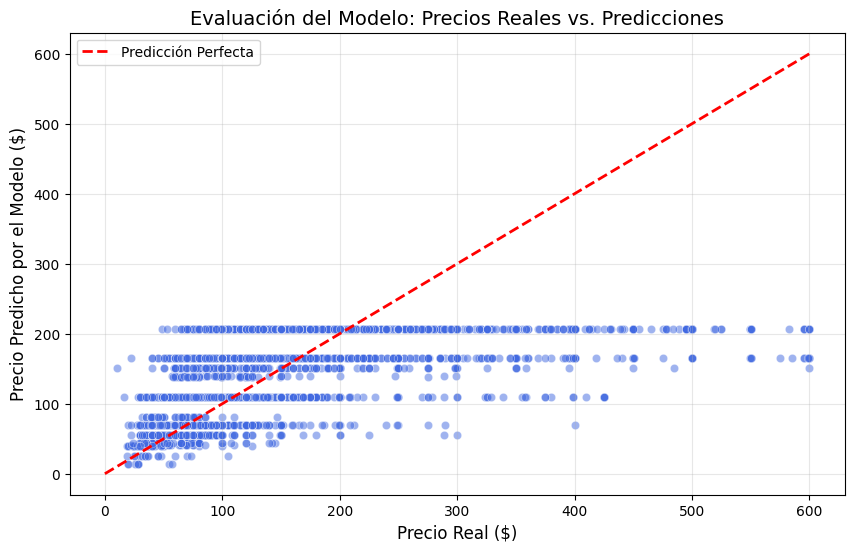

In [22]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=Y_test, y=predicciones, alpha=0.5, color='royalblue')

plt.plot([0, Y_test.max()], [0, Y_test.max()], color='red', linestyle='--', lw=2, label='Predicción Perfecta')


plt.title('Evaluación del Modelo: Precios Reales vs. Predicciones', fontsize=14)
plt.xlabel('Precio Real ($)', fontsize=12)
plt.ylabel('Precio Predicho por el Modelo ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('src/Model_ML.png')
plt.show()